# Chapter 1: basic techniques

In [1]:
import numpy as np
from IPython.core.display import display
from numpy import sin, cos, tan, arctan, arctan2, arcsin, arccos, pi, sqrt

import sympy as smp
from sympy import re, im, arg, I, E

In [2]:
smp.init_printing(use_latex="mathjax")

## Exercise 1.2: system of equations

In this exercise we are asked to solve a list of seven systems of equations. To stay true to the exercise I will use the same symbol names, but x, y, and z would also have done the job.

In [3]:
a, b, c, x, y, z, p, q = smp.symbols("a b c x y z p q")

equations = [4*x + y - 14.5,
             3*x + 2*y - 16.5]

solution = smp.solve(equations)

display(*equations)
print(solution)

4⋅x + y - 14.5

3⋅x + 2⋅y - 16.5

{x: 2.50000000000000, y: 4.50000000000000}


In [4]:
smp.solve([2*p - 4*q + 4, 3*p + 4*q - 24])

{p: 4, q: 3}

In [5]:
smp.solve([3*x + 2*y - 5, 9*x + 6*y - 15])

⎧   5   2⋅y⎫
⎨x: ─ - ───⎬
⎩   3    3 ⎭

There doesn't appear to be a single unique solution for these equations.

In [6]:
smp.solve([2*x + 3*y - 8, x + y -3])

{x: 1, y: 2}

In [7]:
smp.solve([30*x + 20*y - 50, 90*x + 60*y - 10])

[]

There is no possible solution to this system, so interestingly enough Sympy returns an empty list.

In [8]:
equations = [3*x + y + 2*z - 1,
             2*x - 2*y + 4*z + 2,
             x + 2*z + 1]

display(*equations)
smp.solve(equations)

3⋅x + y + 2⋅z - 1

2⋅x - 2⋅y + 4⋅z + 2

x + 2⋅z + 1

{x: 1, y: 0, z: -1}

In [9]:
equations = [2*a + 3*b - 2*c + 8,
             5*a - 2*b + 4*c - 26,
             -a - 2*b + c - 5]
display(*equations)
smp.solve(equations)

2⋅a + 3⋅b - 2⋅c + 8

5⋅a - 2⋅b + 4⋅c - 26

-a - 2⋅b + c - 5

{a: 2, b: -2, c: 3}

## Exercise 1.3: goniometric functions

### Exercise 1.3.1 - conversions

Here we'll just use functions from the built-in math library:

In [10]:
np.degrees(2)

114.59155902616465

In [11]:
np.radians(20)

0.3490658503988659

### Exercise 1.3.2 - triangle

In [12]:
4/5, 3/5, 3/4

(0.8, 0.6, 0.75)

### Exercise 1.3.3 - triangle

In [13]:
angle = arcsin(1/3)

print(f"The cos of ϕ is {cos(angle):.2f} and the tan of ϕ is {tan(angle):.2f}")

The cos of ϕ is 0.94 and the tan of ϕ is 0.35


In [14]:
angle = arctan(2)

print(f"The sin of ϕ is {sin(angle):.2f} and the cos of ϕ is {cos(angle):.2f}")

The sin of ϕ is 0.89 and the cos of ϕ is 0.45


### Exercise 1.3.4 - unit circle

In [15]:
sin(pi) - sin(0.5 * pi), cos(-pi) - cos(0)

(-0.9999999999999999, -2.0)

In [16]:
sin(np.radians(45))

0.7071067811865475

In [17]:
cos(pi / 4)

0.7071067811865476

In [18]:
sin(np.radians(30))

0.49999999999999994

In [19]:
sin(np.radians(210))

-0.5000000000000001

In [20]:
cos(np.radians(30))

0.8660254037844387

In [21]:
cos(pi / 6)

0.8660254037844387

### Exercise 1.3.5 - arctan and arccos

In [22]:
arctan(1)

0.7853981633974483

In [23]:
np.degrees(arccos(0.24)) * -1

-76.11345963737101

### Exercise 1.3.6 - sketches

In [24]:
import matplotlib.pyplot as plt

%config InlineBackend.figure_formats = ['svg']

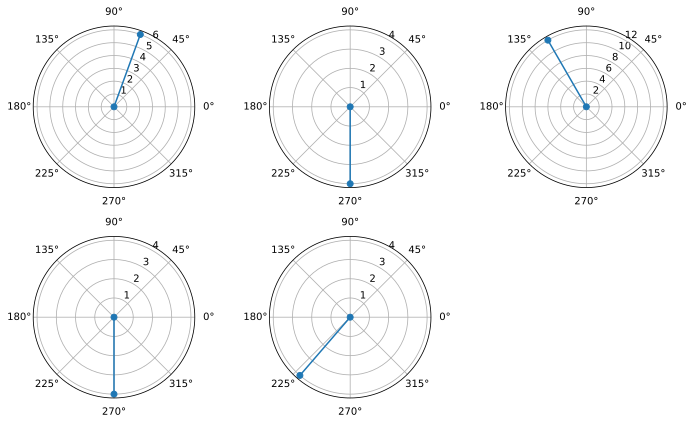

In [25]:
coordinates = [(6, np.radians(70)),
               (4, -pi/2),
               (12, np.radians(120)),
               (4, 3*pi/2),
               (4, 4)]

fig, axs = plt.subplots(2, 3, subplot_kw={'projection': 'polar'}, figsize=(10, 6))
axs = axs.flatten()
axs[-1].remove()


for ax, (radius, angle) in zip(axs, coordinates):
    ax.plot([0, angle], [0, radius], "o-")
    ax.set_rlabel_position(60)
    ax.set_rorigin(0)
plt.tight_layout()
plt.show()

### Exercise 1.3.7 - cranks

In [26]:
def cartesian_to_polar(x_coord: np.ndarray, y_coord: np.ndarray):
    """Converts an x, y coordinate to a polar coordinate"""
    r = sqrt(x_coord**2 + y_coord**2)
    theta = arctan2(y_coord, x_coord)
    return r, theta


origin = np.array([[0.13, 0.27],
                   [0.13, 0.27]])
coordinates = np.array([[0.30, 0.30],
                        [0.03, 0.13]])

coordinates -= origin

polar_coordinates = cartesian_to_polar(*coordinates.T)

for radius, angle in polar_coordinates:
    print(f"The radius of the crank is {radius:.2f}m and the angle wrt the x-axis is {np.degrees(angle) % 360:.2f}°")

The radius of the crank is 0.17m and the angle wrt the x-axis is 9.86°
The radius of the crank is 0.17m and the angle wrt the x-axis is 234.46°


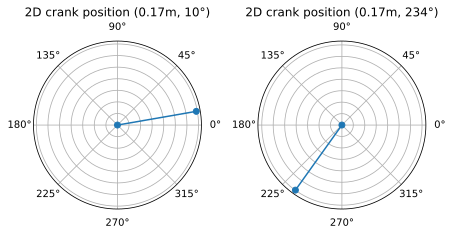

In [27]:
fig, axs = plt.subplots(1, 2, subplot_kw={'projection': 'polar'})

for ax, (radius, angle) in zip(axs, polar_coordinates):
    ax.plot([0, angle], [0, radius], "o-")
    ax.set_yticklabels([])
    ax.set_rorigin(0)
    ax.set_title(f"2D crank position ({radius:.2f}m, {np.degrees(angle) % 360:.0f}°)")
    
plt.tight_layout()
plt.show()

### Exercise 1.3.8 - joint angles

In [28]:
def cosines_angle(side_a: float, side_b: float, side_c: float) -> float:
    """Calculates the angle γ with the rule of cosines in radians"""
    return arccos((side_a**2 + side_b**2 - side_c**2) / (2 * side_a * side_b))


angle = cosines_angle(0.5, 0.4, 0.65)
print(f"The knee angle is {angle:.2f} rad or {np.degrees(angle):.2f}°")

The knee angle is 1.60 rad or 91.79°


### Exercise 1.3.9 - joint angles

In [29]:
hip = np.array([14, 12, 0])  # xyz location
knee = np.array([6, 15, 10])
foot = np.array([-2, 11, 4])

upper_leg = np.linalg.norm(hip - knee)
lower_leg = np.linalg.norm(knee - foot)
foot_hip = np.linalg.norm(hip - foot)

angle = cosines_angle(upper_leg, lower_leg, foot_hip)
print(f"The knee angle is {angle:.2f} rad or {np.degrees(angle):.2f}°")

The knee angle is 1.51 rad or 86.76°


## Exercise 1.4: complex numbers

### Exercise 1.4.1 - solve for a and b

I couldn't get these to work

In [30]:
smp.solve(a**3 + 2*b*I - 27 - 8*I, [a, b])

⎡⎛      3           ⎞⎤
⎢⎜   ⅈ⋅a        27⋅ⅈ⎟⎥
⎢⎜a, ──── + 4 - ────⎟⎥
⎣⎝    2          2  ⎠⎦

In [31]:
smp.solve(smp.Rational(1, 2) * E**-I - 5*a - 3*I*b, [a, b])

⎡⎛           -ⅈ   ⎞⎤
⎢⎜  3⋅ⅈ⋅b   ℯ     ⎟⎥
⎢⎜- ───── + ───, b⎟⎥
⎣⎝    5      10   ⎠⎦

In [32]:
smp.solve(E**(2*I) - 3*a + 6*I*b)

⎡⎧            2⋅ⅈ⎫⎤
⎢⎪           ℯ   ⎪⎥
⎢⎨a: 2⋅ⅈ⋅b + ────⎬⎥
⎢⎪            3  ⎪⎥
⎣⎩               ⎭⎦

### Exercise 1.4.2 - simplify

In [33]:
z = (2 + 6*I) * (3 -4*I)
display(z)

z.simplify()

(2 + 6⋅ⅈ)⋅(3 - 4⋅ⅈ)

30 + 10⋅ⅈ

In [34]:
z = smp.Rational(1, 2) * (2 + 6*I) * (3 - 4*I)**3
display(z)

z.simplify()

                   3
(1 + 3⋅ⅈ)⋅(3 - 4⋅ⅈ) 

15 - 395⋅ⅈ

### Exercise 1.4.3 - real and imaginary part

In [35]:
expression = (2 + 4*I) / (1 + I)
re(expression), im(expression)

(3, 1)

In [36]:
expression = (2 + 4*I) / (1 + I)**2
display(expression)

re(expression), im(expression)

2 + 4⋅ⅈ 
────────
       2
(1 + ⅈ) 

(2, -1)

### Exercise 1.4.4 - solve

In [37]:
smp.solve(x**2 + 2*x + 2)

[-1 - ⅈ, -1 + ⅈ]

### Exercise 1.4.5 - magnitude and argument

In [38]:
z = (44 - 8*I) / (I - 3)**2
display(z)

abs(z), np.degrees(float(arg(z)))

 44 - 8⋅ⅈ
─────────
        2
(-3 + ⅈ) 

(2⋅√5, 26.56505117707799)

In [39]:
z = (2 + I) / (1 - 2*I)**2
display(z)

abs(z), np.degrees(float(arg(z)))

  2 + ⅈ   
──────────
         2
(1 - 2⋅ⅈ) 

⎛√5                  ⎞
⎜──, 153.434948822922⎟
⎝5                   ⎠